<div style="text-align: center;">
    <font color="red" size="+3">Partie 1: Nettoyage des données</font>
</div>

# Problématique

## Open Food Facts
Open Food Facts est une base de données collaborative et open source sur les produits alimentaires du monde entier. Cette initiative a pour objectif de recueillir, de stocker et de rendre accessible des informations détaillées sur les produits alimentaires, notamment leurs compositions, leurs informations nutritionnelles, leurs ingrédients, leurs labels de qualité, leurs informations sur l'origine, etc.  

## Objectif de projet
Actuellement, la saisie des produits dans la base est complexe et peut entraîner des erreurs. Notre mission consiste à concevoir un système de suggestion pour simplifier cette saisie. Dans une première étape, nous nettoyons et explorons les données existantes.  

## Source des données 
Le jeu de données Open Food Facts est disponible sur: https://world.openfoodfacts.org/

## Tâches principales
+Identifiez les variables pertinentes et nettoyez les données, y compris la gestion des valeurs manquantes et des 
    anomalies.  
+Réalisez des visualisations et une analyse univariée pour comprendre les données.  
+Effectuez une analyse multivariée et des tests statistiques pour évaluer la signification des résultats.  
+Rédigez un rapport d'exploration pour conclure sur la faisabilité de l'application demandée.  
+Assurez le respect du RGPD, même en l'absence de données personnelles.  


# caractéristiques du jeu de données
## &emsp;  Import des bibliotheques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

## Imporation et Compréhension des données 

In [2]:
data=pd.read_csv('fr.openfoodfacts.org.products.csv',sep='\t',low_memory=False)

In [3]:
pd.set_option('display.max_columns',None)
data.head(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ]

In [4]:
data.tail()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,NaN,1,Plastique,plastique,Panzani,panzani,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:RO,en:romania,Roumanie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,Plastique,plastique,Trader Joe's,trader-joe-s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Organic peppermint, organic lemon grass, organ...",NaN,NaN,NaN,NaN

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


On peut conclure que : DataFrame a 320772 lignes et 162 colonnes allant de la colonne 'code' à la colonne 'water-hardness_100g', avec un mélange de types de données, principalement des nombres décimaux (float) et des chaînes de caractères (object).le DataFrame utilise environ 396.5 mégaoctets (MB) de mémoire.

In [6]:
data.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'ph_100g', 'fruits-vegetables-nuts_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=162)

D'un coup d'œil initial,on peut constater que notre Dataframe contient plusieurs colonnes ,donc dans cette partie on va supprimer s'il y a des colonnes vides ou des colonnes inutiles pour notre etude.

## Remplissage des données 

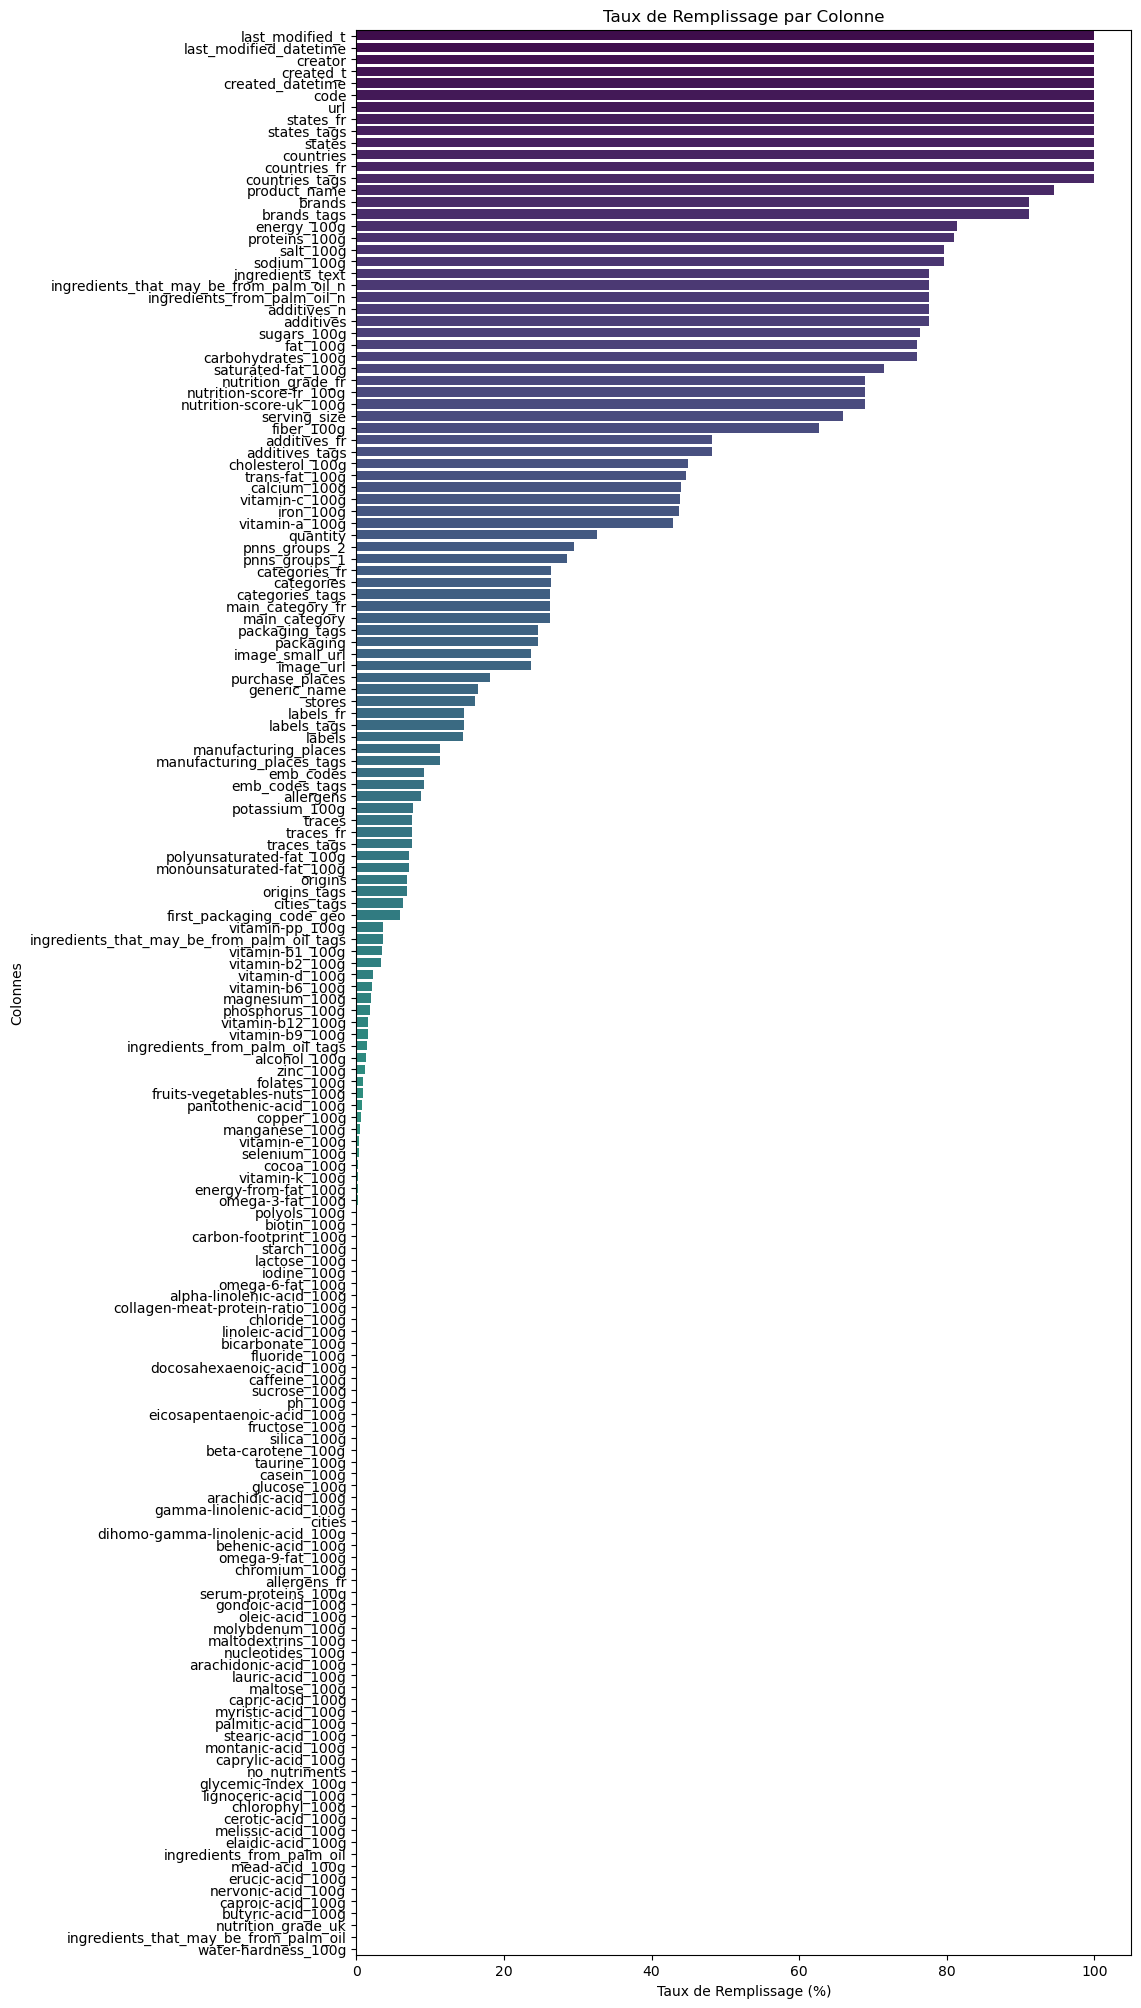

In [7]:
#Voir taux des valeurs manquantes dans chaque colonnes
taux_remplissage = (1 - data.isnull().mean()) * 100
taux_remplissage=taux_remplissage.sort_values(ascending=False)
plt.figure(figsize=(10, 25))
sns.barplot(x=taux_remplissage, y=taux_remplissage.index, palette="viridis")
plt.title("Taux de Remplissage par Colonne")
plt.xlabel("Taux de Remplissage (%)")
plt.ylabel("Colonnes")
plt.show()

In [9]:
## Supprimer les colonnes qui ont plus 50% des valeurs manquantes
df=data.copy()
seuil= 0.5
df=df.dropna(thresh=len(data) * seuil, axis=1)

In [10]:
df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'brands',
       'brands_tags', 'countries', 'countries_tags', 'countries_fr',
       'ingredients_text', 'serving_size', 'additives_n', 'additives',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'states', 'states_tags', 'states_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object')

Vu que notre objectif principal est  la création d’un système de suggestion ou d’auto-complétion pour aider les usagers à remplir plus efficacement la base de données. 
Dans cette étape on va supprimer s'il y a des colonnes inutiles pour cette etude ou les colonnes qui sont identiques:

+ Les colonnes Code et url n'ont aucun utilité pour notre objectif prinipal  
+ les colonnes  'creator', 'created_t', 'created_datetime','last_modified_t', 'last_modified_datetime'  
 Creator est l'utilisateur qui a ajouté ou modifié les informations sur le produit,created_t:est La date de création de l'entrée du produit sous forme de timestamp Unix. created_datetime: La date de création de l'entrée du produit au format de date et d'heure.  last_modified_t: La date de la dernière modification de l'entrée du produit sous forme de timestamp Unix.  
last_modified_datetime: La date de la dernière modification de l'entrée du produit au format de date et d'heure.**Est ces colonnes n'on aucun relation avec grade nutritionnelle** On les supprimes  
+ 'brands','brands_tags'
brands: La marque du produit,brands_tags: Les tags associés à la marque du produit.**Supression** 
+ 'countries', 'countries_tags', 'countries_fr'  
countries: Les pays où le produit est vendu,countries_tags: Les tags associés aux pays où le produit est vendu, countries_fr: Les noms des pays où le produit est vendu en français. **Pour notre projet on garde Countries_fr**  
+ 'additives_n', 'additives'
additives_n: Le nombre d'additifs alimentaires dans le produit,additives: La liste des additifs alimentaires présents dans le produit. **On garde additives_n**  
+ 'ingredients_text', 'serving_size'
ingredients_text: La liste des ingrédients du produit,serving_size: La taille de la portion recommandée du produit. **Supression** 
+ 'ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n'
ingredients_from_palm_oil_n: Le nombre d'ingrédients provenant de l'huile de palme dans le produit,ingredients_that_may_be_from_palm_oil_n: Le nombre d'ingrédients qui peuvent provenir de l'huile de palme dans le produit.  **On garde ingredients_from_palm_oil_n**  
+ 'states', 'states_tags', 'states_fr'  
states: L'état du produit (par exemple, solide, liquide, etc.),states_tags: Les tags associés à l'état du produit,states_fr: La description de l'état du produit en français. **N'ont aucun impact sur notre projet**
+ 'nutrition-score-fr_100g','nutrition-score-uk_100g'  
**Sont identiques on garde nutrition-score-fr_100g.**

**Nous allons éliminer les colonnes qui ne revêtent pas d'intérêt pour notre analyse.**

In [12]:
df=df.drop(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime','brands','additives_n','ingredients_from_palm_oil_n',
       'brands_tags', 'countries', 'countries_tags', 'ingredients_text', 'serving_size','additives','states','states_tags','states_fr',
       'ingredients_that_may_be_from_palm_oil_n','nutrition-score-uk_100g'],axis=1)

In [13]:
df.shape

(320772, 13)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   product_name             303010 non-null  object 
 1   countries_fr             320492 non-null  object 
 2   nutrition_grade_fr       221210 non-null  object 
 3   energy_100g              261113 non-null  float64
 4   fat_100g                 243891 non-null  float64
 5   saturated-fat_100g       229554 non-null  float64
 6   carbohydrates_100g       243588 non-null  float64
 7   sugars_100g              244971 non-null  float64
 8   fiber_100g               200886 non-null  float64
 9   proteins_100g            259922 non-null  float64
 10  salt_100g                255510 non-null  float64
 11  sodium_100g              255463 non-null  float64
 12  nutrition-score-fr_100g  221210 non-null  float64
dtypes: float64(10), object(3)
memory usage: 31.8+ MB


In [15]:
df.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,2.611130e+05,243891.000000,229554.000000,243588.000000,244971.000000,200886.000000,259922.000000,255510.000000,255463.000000,221210.000000
mean,1.141915e+03,12.730379,5.129932,32.073981,16.003484,2.862111,7.075940,2.028624,0.798815,9.165535
std,6.447154e+03,17.578747,8.014238,29.731719,22.327284,12.867578,8.409054,128.269454,50.504428,9.055903
min,0.000000e+00,0.000000,0.000000,0.000000,-17.860000,-6.700000,-800.000000,0.000000,0.000000,-15.000000
25%,3.770000e+02,0.000000,0.000000,6.000000,1.300000,0.000000,0.700000,0.063500,0.025000,1.000000
50%,1.100000e+03,5.000000,1.790000,20.600000,5.710000,1.500000,4.760000,0.581660,0.229000,10.000000
75%,1.674000e+03,20.000000,7.140000,58.330000,24.000000,3.600000,10.000000,1.374140,0.541000,16.000000
max,3.251373e+06,714.290000,550.000000,2916.670000,3520.000000,5380.000000,430.000000,64312.800000,25320.000000,40.000000


In [16]:
df.describe(include='object')

,product_name,countries_fr,nutrition_grade_fr
count,303010,320492,221210
unique,221347,722,5
top,Ice Cream,États-Unis,d
freq,410,172998,62763


# Traitements des données 

## Lignes dupliquées

In [17]:
def check_for_duplicates(dataframe):
    are_duplicates = dataframe.duplicated().any()
    return are_duplicates

result = check_for_duplicates(df)

if result:
    print("Il y a des lignes dupliquées dans le DataFrame.")
else:
    print("Il n'y a pas de lignes dupliquées dans le DataFrame.")

Il y a des lignes dupliquées dans le DataFrame.


In [18]:
df = df.drop_duplicates()

In [20]:
duplicate_mask = df.duplicated(keep=False)
duplicate_rows = df[duplicate_mask]
if not duplicate_rows.empty:
    print("Lignes dupliquées dans le DataFrame :")
    print(duplicate_rows)
else:
    print("Il n'y a pas de lignes dupliquées dans le DataFrame.")

Il n'y a pas de lignes dupliquées dans le DataFrame.


## Valeurs abberantes

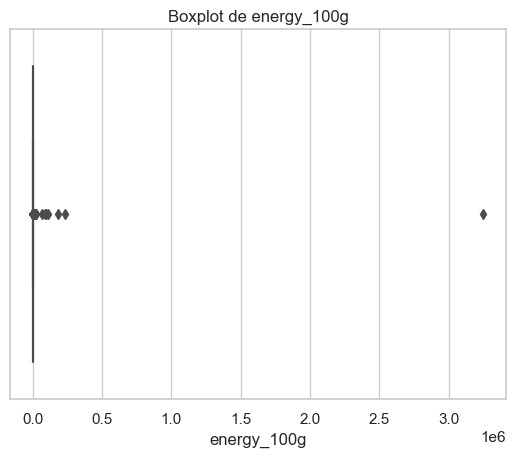

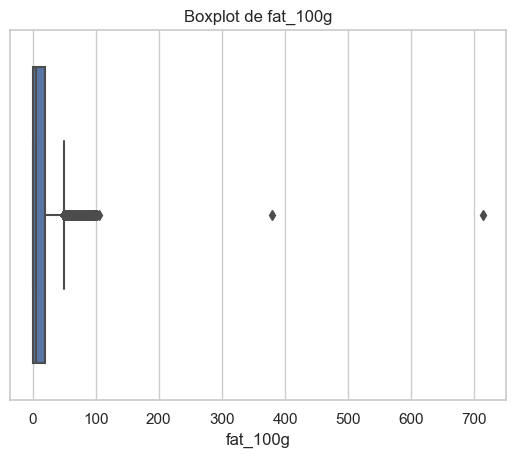

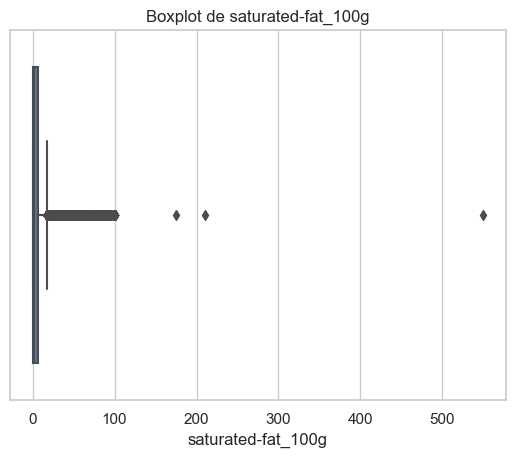

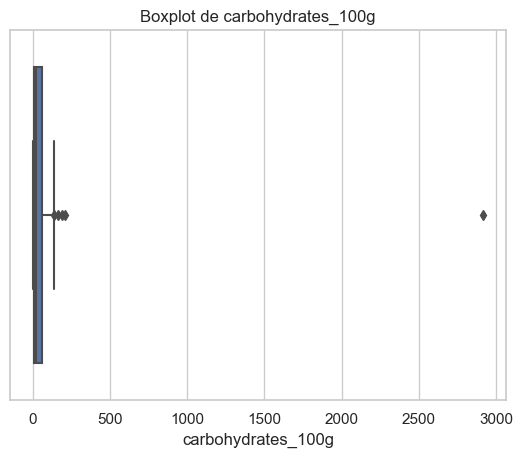

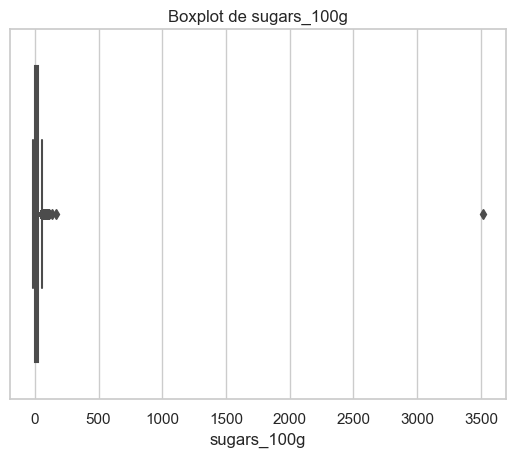

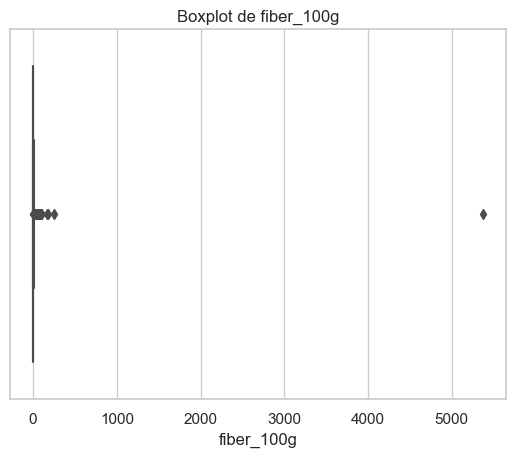

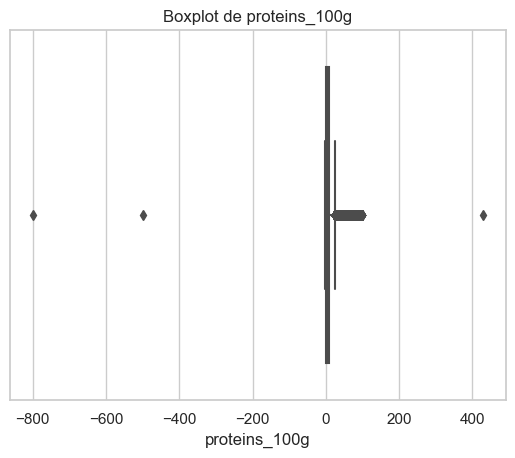

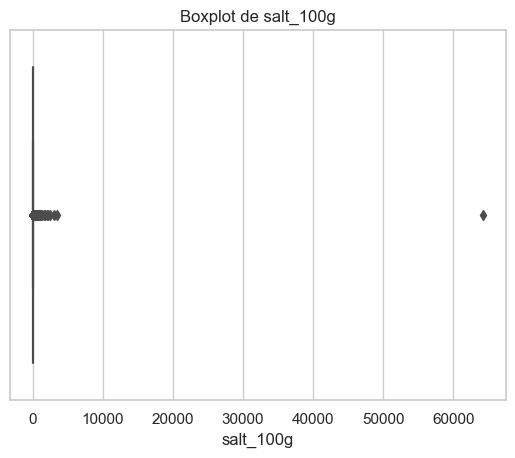

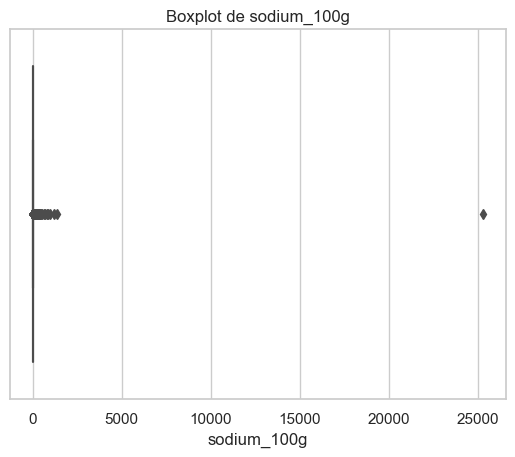

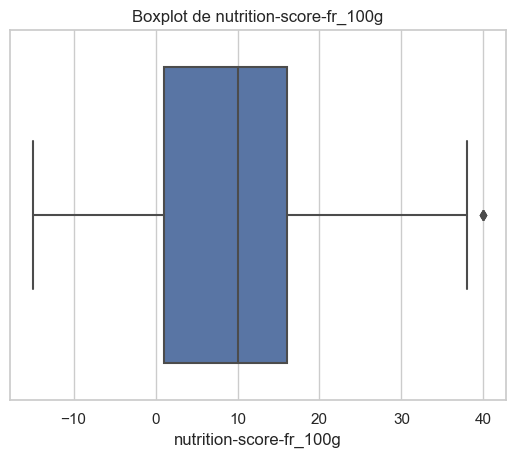

In [21]:
numeric_colonnes=df.select_dtypes(include='number')
for col in numeric_colonnes.columns:
    plt.figure()
    sns.set(style="whitegrid")  
    sns.boxplot(x=numeric_colonnes[col])  
    plt.title(f"Boxplot de {col}")  
    plt.show()

Après avoir examiné les graphiques en boîte (boxplots), il est évident que plusieurs variables présentent des valeurs aberrantes. Dans le cas des ingrédients pour 100g, certaines valeurs dépassent 100, tandis que d'autres sont inférieures à 0.

### Traitements des valeurs abberantes

#### Colonne d'Energy

En se référant aux données disponibles sur le site mentionné https://informationsnutritionnelles.fr/energie-kilojoules, il est possible d'affirmer que la valeur maximale de l'énergie pour la plupart des produits en france est de 3700 kJ.

In [22]:
def supprimer_outliers_energy(données):
    données.loc[données['energy_100g'] > 3700, 'energy_100g'] = np.nan
    return données

supprimer_outliers_energy(df)

,product_name,countries_fr,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,Farine de blé noir,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Banana Chips Sweetened (Whole),États-Unis,d,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0
2,Peanuts,États-Unis,b,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0
3,Organic Salted Nut Mix,États-Unis,d,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0
4,Organic Polenta,États-Unis,NaN,1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,Tomato & ricotta,Roumanie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",États-Unis,b,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00000,0.000,0.0
320769,乐吧泡菜味薯片,Chine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,Tomates aux Vermicelles,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Ingrédients _100g

Il est évident que les valeurs en deçà de zéro sont des anomalies. De plus, étant donné que ces valeurs se rapportent à des ingrédients dont la quantité maximale est de 100 grammes, on peut également qualifier de non conformes les valeurs dépassant 100.

In [23]:
def sup_valeurs_hors_limites(données, colonnes):
    for col in colonnes:
        données.loc[données[col] < 0, col] = np.nan
        données.loc[données[col] > 100, col] = np.nan
    return données

colonnes_sup_100=['fat_100g','saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g','proteins_100g', 'salt_100g', 'sodium_100g']
df = sup_valeurs_hors_limites(df, colonnes_sup_100)

#### Nutri score colonne

 On se basons sur les données existent dans le site suivant : https://quoidansmonassiette.fr/etiquetage-nutritionnel-nutri-score-5-c-vainqueur-de-la-guerre-des-logos-nutritionnels/ .  
 
 On constate que les valeurs de nutri-score est entre -15 et 40 donc il ne contient pas des valeurs abberantes
 

#### Satured_Fat<Fat

In [24]:
df.where(df['saturated-fat_100g']>df['fat_100g']).count()

product_name               337
countries_fr               354
nutrition_grade_fr         316
energy_100g                349
fat_100g                   354
saturated-fat_100g         354
carbohydrates_100g         344
sugars_100g                331
fiber_100g                 299
proteins_100g              341
salt_100g                  338
sodium_100g                338
nutrition-score-fr_100g    316
dtype: int64

In [25]:
def corriger_comparable_colonnes(df, colonne_base, deuxieme_colonne):
    df[colonne_base].where(df[colonne_base] <= df[deuxieme_colonne], inplace=True)

In [26]:
corriger_comparable_colonnes(df, 'saturated-fat_100g', 'fat_100g')

#### Soduim<Salt

In [27]:
df.where(df['sodium_100g']>df['salt_100g']).count()

product_name               0
countries_fr               0
nutrition_grade_fr         0
energy_100g                0
fat_100g                   0
saturated-fat_100g         0
carbohydrates_100g         0
sugars_100g                0
fiber_100g                 0
proteins_100g              0
salt_100g                  0
sodium_100g                0
nutrition-score-fr_100g    0
dtype: int64

#### sucre>carbohydrate

In [28]:
df.where(df['sugars_100g']>df['carbohydrates_100g']).count()

product_name               667
countries_fr               667
nutrition_grade_fr         598
energy_100g                663
fat_100g                   665
saturated-fat_100g         596
carbohydrates_100g         667
sugars_100g                667
fiber_100g                 571
proteins_100g              657
salt_100g                  662
sodium_100g                663
nutrition-score-fr_100g    598
dtype: int64

In [29]:
corriger_comparable_colonnes(df, 'sugars_100g', 'carbohydrates_100g')

#### Somme colonnes >100 

In [30]:
def supprimer_ligne_sup_100(df, colonne, valeur):
    df['somme'] = df[colonne].sum(axis=1)
    df.drop(df[df['somme'] > valeur].index, inplace=True)
    df.drop(columns=['somme'], inplace=True)

In [31]:
valeur = 100
supprimer_ligne_sup_100(df, colonnes_sup_100, valeur)

## Traitement des valeurs manquantes

In [32]:
df.isnull().mean()

product_name               0.011322
countries_fr               0.000992
nutrition_grade_fr         0.328882
energy_100g                0.200367
fat_100g                   0.281989
saturated-fat_100g         0.390660
carbohydrates_100g         0.284041
sugars_100g                0.344613
fiber_100g                 0.398633
proteins_100g              0.203687
salt_100g                  0.223696
sodium_100g                0.223478
nutrition-score-fr_100g    0.328882
dtype: float64

### Imputation par 0

#### Colonne fiber_100g

In [33]:
def imputer_fiber_par_zero(df):
    df['fiber_100g'].fillna(0, inplace=True)

In [34]:
imputer_fiber_par_zero(df)

#### Imputation KNN

In [35]:
echantillon = df.sample(n=50000, random_state=1) 

In [36]:
echantillon.shape

(50000, 13)

In [37]:
echantillon.isnull().mean()

product_name               0.01212
countries_fr               0.00092
nutrition_grade_fr         0.32546
energy_100g                0.19538
fat_100g                   0.27612
saturated-fat_100g         0.38578
carbohydrates_100g         0.27834
sugars_100g                0.33794
fiber_100g                 0.00000
proteins_100g              0.19886
salt_100g                  0.21950
sodium_100g                0.21926
nutrition-score-fr_100g    0.32546
dtype: float64

In [38]:
colonnes_numeriques = echantillon.select_dtypes(include='number')
imputer = KNNImputer(n_neighbors=5)
echantillon[colonnes_numeriques.columns] = imputer.fit_transform(colonnes_numeriques)

In [ ]:
echantillon.isnull().mean()

#### Imputation nutrition grade

On se basons sur les informations que:https://quoidansmonassiette.fr/etiquetage-nutritionnel-nutri-score-5-c-vainqueur-de-la-guerre-des-logos-nutritionnels/ .   
-15 à -2 : A  
-1 à 3 : B  
4 à 11 : C  
12 à 16 :D  
Plus de 17 :E

In [39]:
def imputation_nutrtion_grade(a):
    if -15 <= a <= -2:
        return 'A'
    elif -1 <= a <= 3:
        return 'B'
    elif 4 <= a <= 11:
        return 'C'
    elif 12 <= a <= 16:
        return 'D'
    elif a >= 17:
        return 'E'
    
echantillon['nutrition_grade_fr']=echantillon['nutrition-score-fr_100g'].apply(imputation_nutrtion_grade)

In [40]:
echantillon.isnull().mean()

product_name               0.01212
countries_fr               0.00092
nutrition_grade_fr         0.01516
energy_100g                0.00000
fat_100g                   0.00000
saturated-fat_100g         0.00000
carbohydrates_100g         0.00000
sugars_100g                0.00000
fiber_100g                 0.00000
proteins_100g              0.00000
salt_100g                  0.00000
sodium_100g                0.00000
nutrition-score-fr_100g    0.00000
dtype: float64

#### Dropna

In [41]:
echantillon=echantillon.dropna()

In [42]:
echantillon = echantillon.merge(data[['product_name', 'pnns_groups_1', 'pnns_groups_2']], on='product_name', how='left')

In [43]:
echantillon.isnull().mean()

product_name               0.000000
countries_fr               0.000000
nutrition_grade_fr         0.000000
energy_100g                0.000000
fat_100g                   0.000000
saturated-fat_100g         0.000000
carbohydrates_100g         0.000000
sugars_100g                0.000000
fiber_100g                 0.000000
proteins_100g              0.000000
salt_100g                  0.000000
sodium_100g                0.000000
nutrition-score-fr_100g    0.000000
pnns_groups_1              0.831744
pnns_groups_2              0.828153
dtype: float64

In [44]:
echantillon.to_csv('data_nettoyer_final.csv', index=False)